In [1]:
import pylab as plt
import multiprocessing as mp
from train import train, epochs, get_data

c:\users\ligua\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\ligua\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\ligua\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\ligua\appd

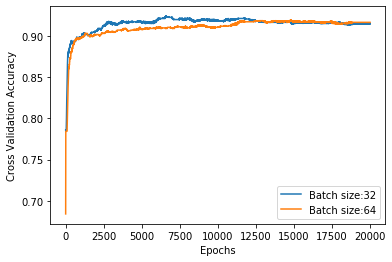

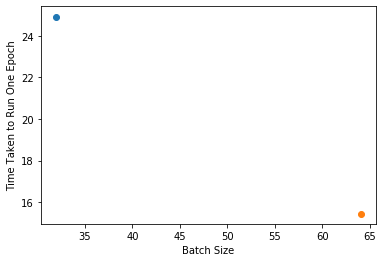

In [2]:
def main():
    data = get_data()
    params = []
    param1 = {}
    param1['weight_decay_parameter'] = 1e-6
    param1['batch_size'] = 4
    param1['hidden_layer_neuron_num'] = 10
    param1['required'] = 'cross-validation accuracy'
    param1['hidden_layer_num'] = 1
    param1['data'] = data
    param2 = param1.copy()
    param3 = param1.copy()
    param4 = param1.copy()
    param5 = param1.copy()
    
    params.append(param1)
    param2['batch_size'] = 8
    params.append(param2)
    param3['batch_size'] = 16
    params.append(param3)
    param4['batch_size'] = 32
    params.append(param4)
    param5['batch_size'] = 64
    params.append(param5)
    no_threads = mp.cpu_count()
    p = mp.Pool(processes=no_threads)
    accs = p.map(train, params)
    plt.figure()
    for i in range(len(params)):
        plt.plot(range(epochs), accs[i][0], label='Batch size:' 
                 + str(params[i]['batch_size']))
    plt.xlabel('Epochs')
    plt.ylabel('Cross Validation Accuracy')
    plt.legend()
    plt.savefig('Q2.png', bbox_inches='tight', dpi=100)
    plt.show()

    
    plt.figure()
    for i in range(len(params)):
        plt.scatter(params[i]['batch_size'], accs[i][1])
    plt.xlabel('Batch Size')
    plt.ylabel('Time Taken to Run One Epoch')
    plt.savefig('Q2_Time.png', bbox_inches='tight', dpi=100)
    plt.show()

    
if __name__ == '__main__':
    main()